# **Spotify Music Trends**

---

# Introduction
This project explores Spotify's dataset through data visualizations to uncover trends and insights in the music industry. By analyzing key audio features such as danceability, energy, tempo, and popularity across different genres and years, we aim to highlight patterns and changes in music preferences. Through various visualizations, we’ll delve into how genres evolve, how song features relate to popularity, and how trends have shifted over time. This exploratory analysis showcases the power of data visualization in understanding the dynamics of the music industry.

# 1. Load data

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# FOR GOOGLE COLAB
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Load the data
# df = pd.read_csv('/content/drive/Othercomputers/My Laptop - Personal/Files/Data_Files/Portfolio Projects/1 Million songs Spotify/Data/spotify_data.csv', index_col=0) # Google colab file path
df = pd.read_csv('Data/spotify_data.csv', index_col=0) # local file path
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [4]:
# import sweetviz as sv

# # Generate the Sweetviz report
# report = sv.analyze(df)

# # Show the report in Jupyter Notebook
# report.show_html('report.html')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 0 to 1473395
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  tempo

| Feature Name | Description |
| :--- | :--- |
| popularity | A measure of the song's popularity on Spotify |
| year | The year the song was released |
| genre | The primary genre of the song |
| danceability | Describes how suitable the track is for dancing |
| energy | Represents the perceived intensity and activity level of the track |
| key | The musical key of the song |
| loudness | The overall loudness of the track in decibels (dB) |
| mode | Indicates whether the track is in major (1) or minor (0) key |
| speechiness | The presence of spoken words in the track |
| acousticness | A confidence measure of whether the track is acoustic |
| instrumentalness | The presence of vocals in the track |
| liveness | A confidence measure of whether the track was performed live |
| valence | The positivity conveyed by the track |
| tempo | The average tempo of the track in beats per minute (BPM) |
| time_signature | The time signature of the track |
| duration_minutes | The duration of the track in minutes |

In [6]:
def data_summary(data):
    """
    Prints a comprehensive summary of the Spotify dataset, including:
    - Total number of tracks, columns, unique artists, unique tracks, and genres.
    - Year range of the dataset and average track duration.
    - Most frequent artist and genre distribution.

    Parameters:
        data (DataFrame): A pandas DataFrame containing Spotify data with
                          columns 'artist_name', 'track_name', 'year',
                          'genre', and 'duration_ms'.
    """
    # Total number of rows and columns
    total_rows, total_columns = data.shape
    print(f"Total number of tracks: {total_rows}")
    print(f"Total number of columns: {total_columns}")
    print('-' * 50)

    # Unique artists, tracks, genres, and year range
    unique_artists = data['artist_name'].nunique()
    unique_tracks = data['track_name'].nunique()
    unique_genres = data['genre'].nunique()
    earliest_year = data['year'].min()
    latest_year = data['year'].max()

    print(f"Number of unique artists: {unique_artists}")
    print(f"Number of unique tracks: {unique_tracks}")
    print(f"Number of unique genres: {unique_genres}")
    print(f"Year range: {earliest_year} - {latest_year}")
    print('-' * 50)

    # List of unique genres
    genres = data['genre'].unique()
    print(f"Genres in the dataset: {', '.join(genres)}")
    print('-' * 50)

    # Average duration of tracks in seconds
    average_duration = data['duration_ms'].mean() / 1000  # Convert milliseconds to seconds
    print(f"Average duration of tracks: {average_duration:.2f} seconds")
    print('-' * 50)

    # Most frequent artist
    most_frequent_artist = data['artist_name'].mode()[0]
    print(f"Most frequent artist: {most_frequent_artist}")
    print('-' * 50)

    # Genre distribution (top 10 genres for brevity)
    genre_distribution = data['genre'].value_counts().head(10)
    print("Top 10 most common genres in the dataset:")
    print(genre_distribution)
    print('-' * 50)

    # Additional insights: Number of missing values in each column
    missing_values = data.isnull().sum()
    print("Missing values in each column:")
    print(missing_values)
    print('-' * 50)

In [7]:
data_summary(df)

Total number of tracks: 1159764
Total number of columns: 19
--------------------------------------------------
Number of unique artists: 64158
Number of unique tracks: 882360
Number of unique genres: 82
Year range: 2000 - 2023
--------------------------------------------------
Genres in the dataset: acoustic, afrobeat, alt-rock, ambient, black-metal, blues, breakbeat, cantopop, chicago-house, chill, classical, club, comedy, country, dance, dancehall, death-metal, deep-house, detroit-techno, disco, drum-and-bass, dub, dubstep, edm, electro, electronic, emo, folk, forro, french, funk, garage, german, gospel, goth, grindcore, groove, guitar, hard-rock, hardcore, hardstyle, heavy-metal, hip-hop, house, indian, indie-pop, industrial, jazz, k-pop, metal, metalcore, minimal-techno, new-age, opera, party, piano, pop, pop-film, power-pop, progressive-house, psych-rock, punk, punk-rock, rock, rock-n-roll, romance, sad, salsa, samba, sertanejo, show-tunes, singer-songwriter, ska, sleep, songwrite

In [8]:
# Check for duplicates
df.duplicated().sum()

0

In [9]:
df['genre'].nunique()

82

In [34]:
# Count the occurrences of each genre
genre_counts = df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Create the horizontal bar plot
fig = px.bar(genre_counts, y='genre', x='count', title='Genre Count Distribution',
             labels={'genre': 'Genre', 'count': 'Count'}, orientation='h')

# Update the layout for a larger figure
fig.update_layout(
    width=1000,
    height=1500,
    title={'x': 0.5},
)

# Show the plot
fig.show()

- `black-metal` seems to be dominant in the dataset with a count of 21,852 song, closely followed by gospel with 21,621 song representing it.

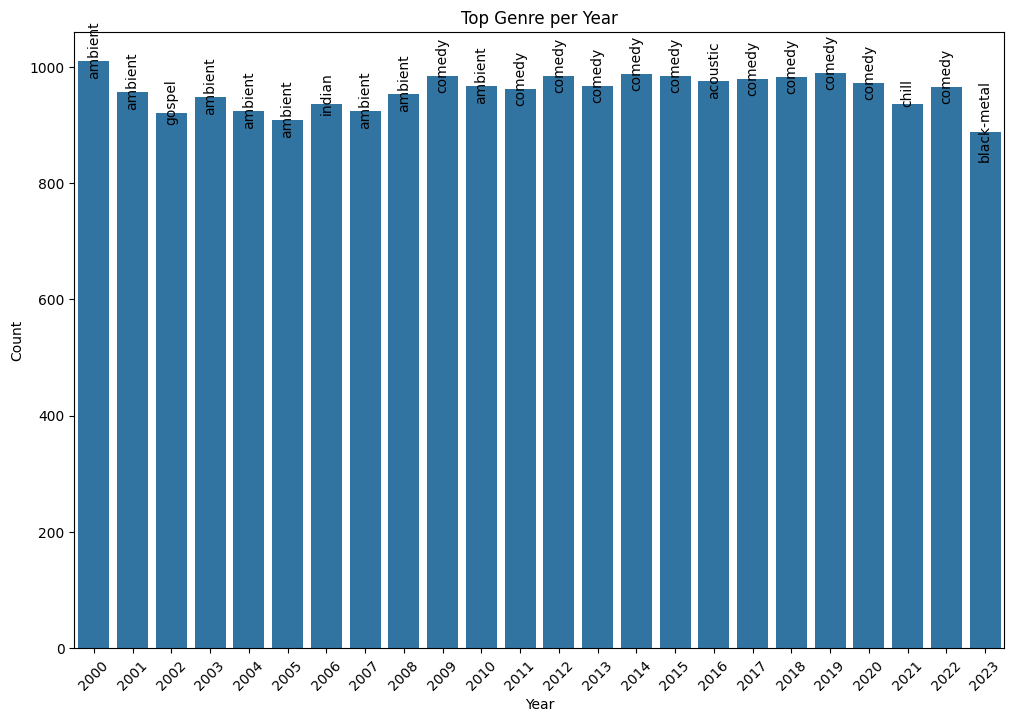

In [35]:
# Group by year and genre, then count occurrences
top_genre_per_year = df.groupby(['year', 'genre']).size().reset_index(name='count')

# Find the top genre for each year
top_genre_per_year = top_genre_per_year.loc[top_genre_per_year.groupby('year')['count'].idxmax()]

# Set up the Seaborn plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_genre_per_year, x='year', y='count')

# Add title and labels
plt.title('Top Genre per Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Annotate each bar with the genre name
for p in ax.patches:
    genre_name = top_genre_per_year.loc[top_genre_per_year['count'] == p.get_height(), 'genre'].values[0]
    ax.annotate(genre_name, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', rotation = 90,
                xytext=(0, 8), textcoords='offset points')

# Show the plot
plt.show()